In [103]:
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [104]:
data=pd.read_csv('data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [106]:
data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

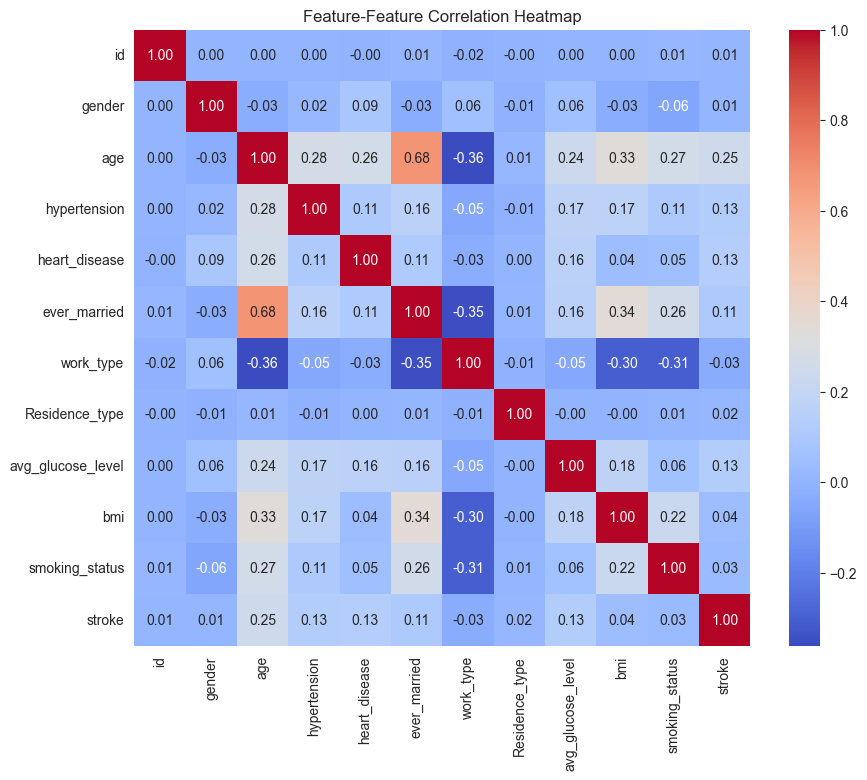

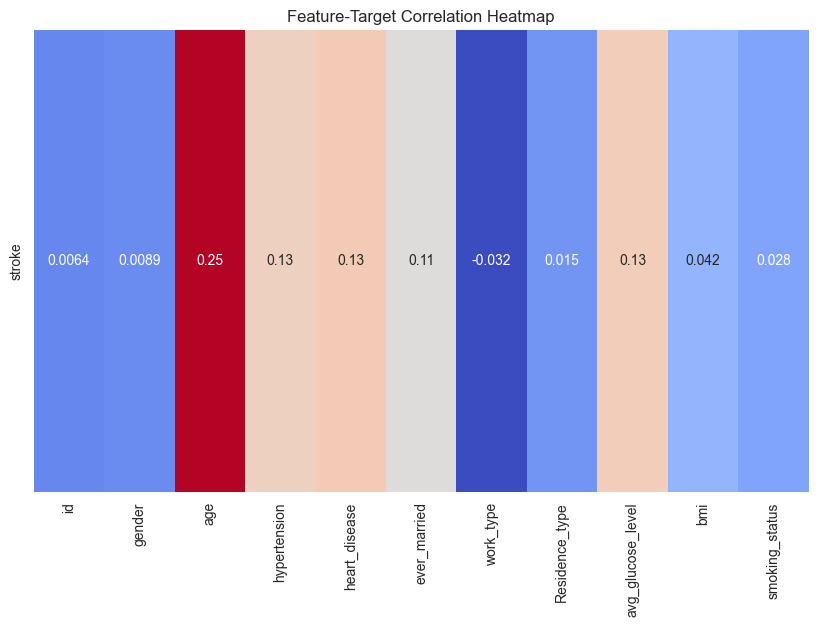

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = data.copy()

for col in data.select_dtypes(include=['object', 'category']).columns:
    data_encoded[col] = data[col].astype('category').cat.codes
    
correlation = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature-Feature Correlation Heatmap')
plt.show()

target_correlations = correlation['stroke'].drop('stroke')

plt.figure(figsize=(10, 6))
sns.heatmap(target_correlations.to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Feature-Target Correlation Heatmap')
plt.show()

In [108]:
data_encoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [109]:
df = data.copy()
df = df.drop(columns=['id', 'gender'])
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [111]:
imputer = KNNImputer(n_neighbors=3)
df[['bmi']] = imputer.fit_transform(df[['bmi']])

<Axes: xlabel='stroke', ylabel='count'>

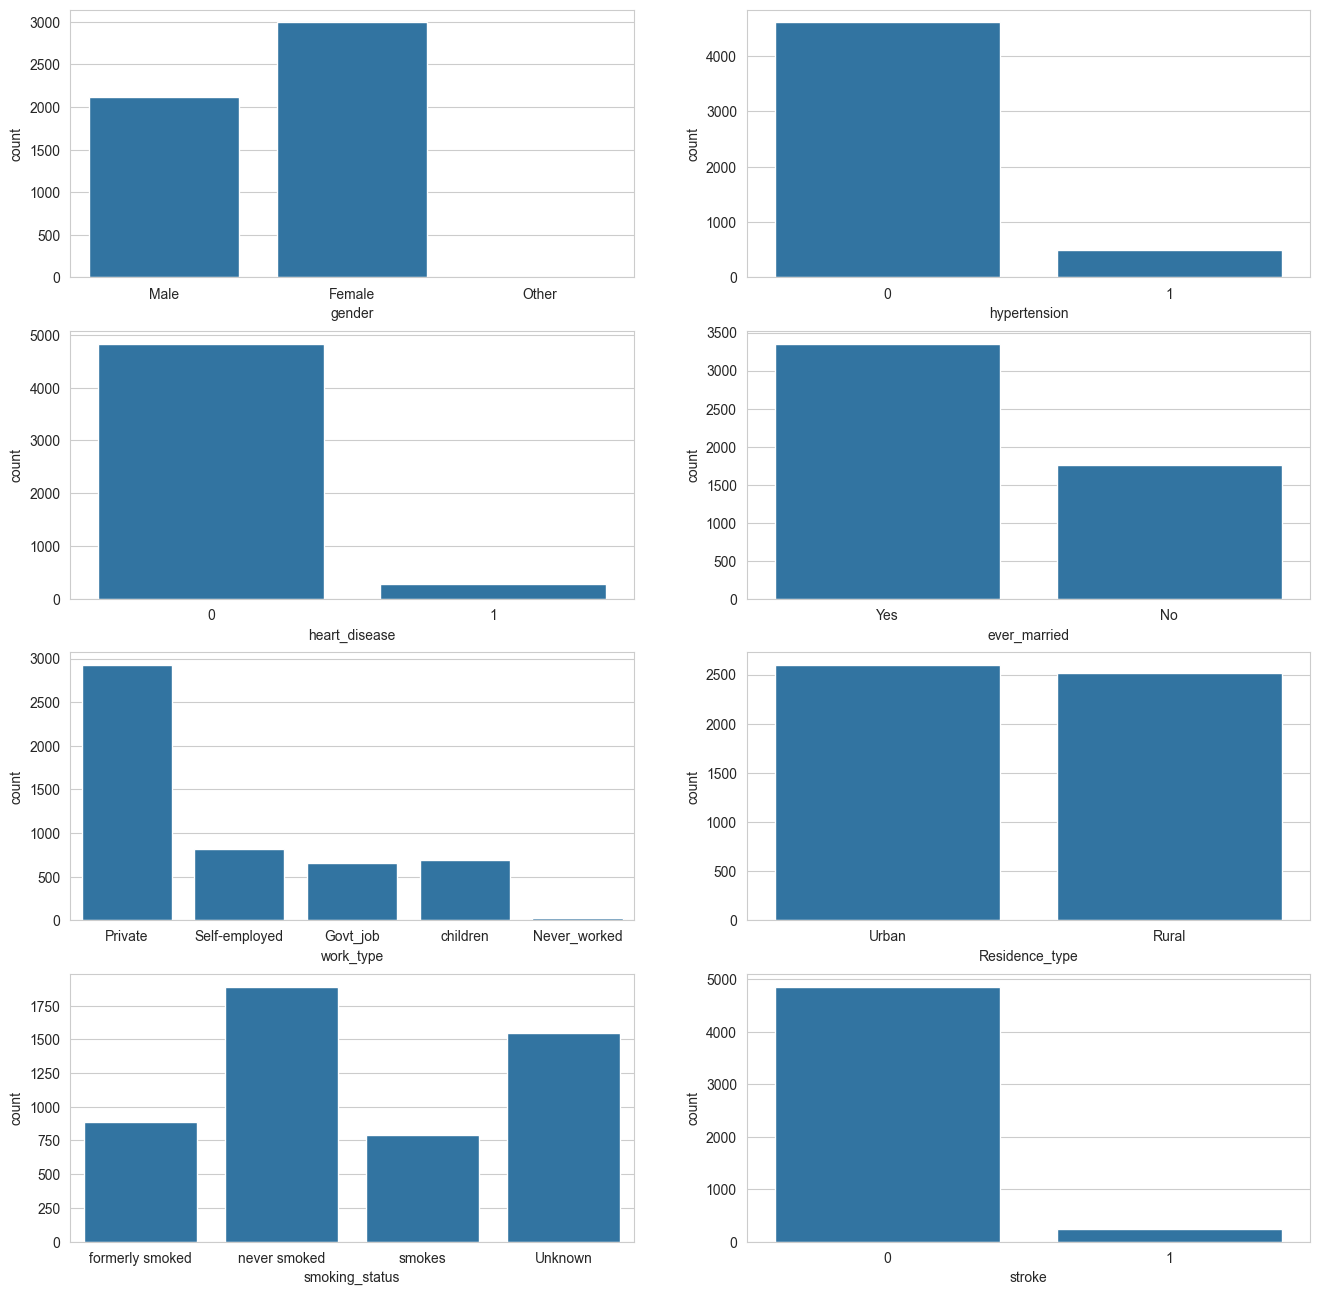

In [112]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

In [113]:
En = LabelEncoder()

df['ever_married'] = En.fit_transform(df['ever_married'])
df['work_type'] = En.fit_transform(df['work_type'])
df['Residence_type'] = En.fit_transform(df['Residence_type'])
df['smoking_status'] = En.fit_transform(df['smoking_status'])

df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [114]:
from sklearn.preprocessing import RobustScaler

continuous_features = ['age', 'avg_glucose_level', 'bmi']

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[continuous_features])

df[continuous_features] = scaled_data

df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.611111,0,1,1,2,1,3.712987,0.911111,1,1
1,0.444444,0,0,1,3,0,2.994300,0.054804,2,1
2,0.972222,0,1,1,2,0,0.380920,0.455556,2,1
3,0.111111,0,0,1,2,1,2.153481,0.666667,3,1
4,0.944444,1,0,1,3,0,2.231917,-0.488889,2,1


In [83]:
y = df['stroke']
x = df.drop('stroke', axis = 1)

In [84]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Original class distribution:", Counter(y))

smote_enn = SMOTEENN(random_state=42)
x, y = smote_enn.fit_resample(x, y)

print("After SMOTEENN resampling:", Counter(y))


Original class distribution: Counter({0: 4861, 1: 249})
After SMOTEENN resampling: Counter({1: 4569, 0: 3941})


Text(0.5, 1.0, 'After SMOTEENN Resampling (Balanced)')

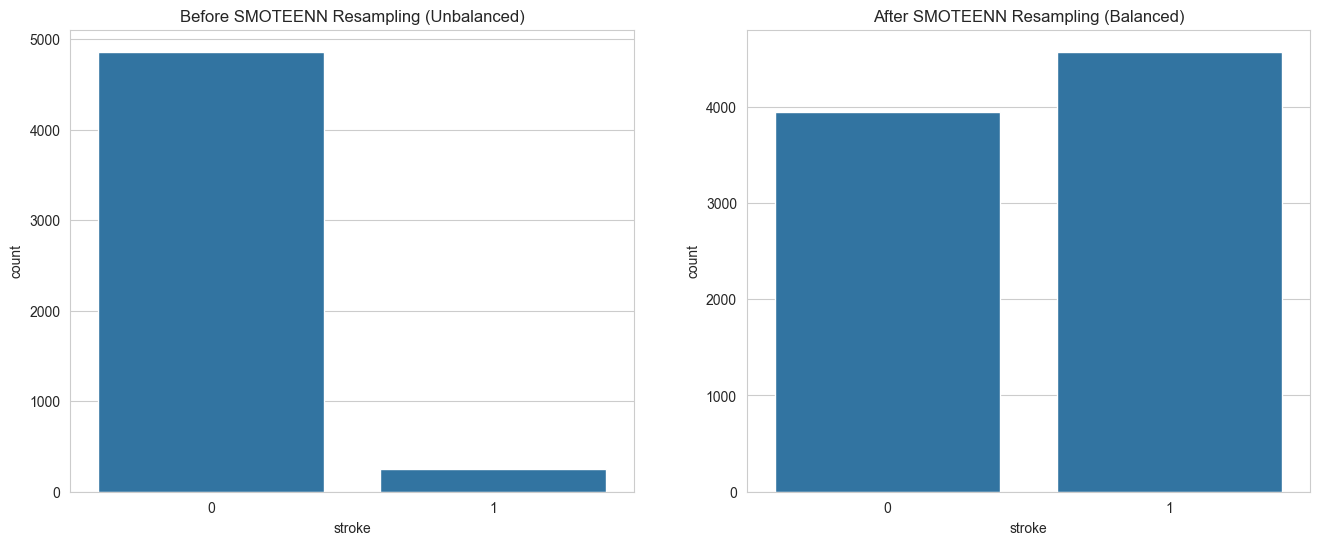

In [85]:
fig,axes = plt.subplots(1,2,figsize = (16,6))
sns.set_style('whitegrid')

sns.countplot(ax=axes[0],data=df,x='stroke')
axes[0].set_title('Before SMOTEENN Resampling (Unbalanced)')
sns.countplot(ax=axes[1],data=pd.DataFrame(y),x='stroke')
axes[1].set_title('After SMOTEENN Resampling (Balanced)')

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [87]:
import mlflow
from mlflow.models import infer_signature
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
signature = infer_signature(x_train_np, y_train_np)

In [88]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_model(optimizer="adam", activation="relu", l2_value=0.01):
    model = keras.Sequential([
        layers.Dense(125, activation=activation, input_shape=(9,)),
        layers.Dense(100, activation=activation),
        layers.Dense(75, activation=activation),
        layers.Dense(50, activation=activation, kernel_regularizer=regularizers.l2(l2_value)),
        layers.Dense(25, activation=activation, kernel_regularizer=regularizers.l2(l2_value)),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

def objective(params):
    model = create_model(
        optimizer=params['model__optimizer'],
        l2_value=params['model__l2_value'],
    )
    model.fit(x_train, y_train, epochs=int(params['epochs']), validation_split=0.2, verbose=0)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int))
    recall = recall_score(y_test, (y_pred > 0.5).astype(int))
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int))

    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model, 'precision': precision, 'recall': recall, 'f1 score': f1}

space = {
    'model__optimizer': hp.choice('model__optimizer', ['adam', 'sgd']),
    'model__l2_value': hp.choice('model__l2_value', [0.01, 0.1]),
    'epochs': hp.choice('epochs', [10, 20])
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step
28/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 10%|█         | 1/10 [00:15<02:19, 15.45s/trial, best loss: -0.86427732079906]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step              
29/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step      
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step      
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step      

 20%|██        | 2/10 [00:23<01:31, 11.38s/trial, best loss: -0.86427732079906]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step              
29/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step      
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step      
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step      

 30%|███       | 3/10 [00:40<01:37, 13.94s/trial, best loss: -0.9089306698002351]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step                
33/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

 40%|████      | 4/10 [00:49<01:10, 11.81s/trial, best loss: -0.9089306698002351]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step                 
26/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step         
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

 50%|█████     | 5/10 [00:57<00:52, 10.56s/trial, best loss: -0.9089306698002351]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step                 
22/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step         
50/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

 60%|██████    | 6/10 [01:12<00:47, 11.97s/trial, best loss: -0.9089306698002351]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step                 
23/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step         
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

 70%|███████   | 7/10 [01:27<00:38, 12.87s/trial, best loss: -0.9089306698002351]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step                
30/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

 80%|████████  | 8/10 [01:44<00:28, 14.19s/trial, best loss: -0.9353701527614571]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step                
25/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step        

 90%|█████████ | 9/10 [02:02<00:15, 15.51s/trial, best loss: -0.9353701527614571]

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 1/54 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step                
27/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step        
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step        

100%|██████████| 10/10 [02:19<00:00, 13.99s/trial, best loss: -0.9353701527614571]


In [89]:
print("Accuracy: ", -trials.best_trial['result']['loss'])
print("Best hyperparameters: ", best)

Accuracy:  0.9353701527614571
Best hyperparameters:  {'epochs': np.int64(1), 'model__l2_value': np.int64(0), 'model__optimizer': np.int64(0)}


In [90]:
from urllib.parse import urlparse

mlflow.set_experiment("Brain Stroke Prediction")

optimizer_mapping = ['adam', 'sgd']
l2_value_mapping = [0.01, 0.1]
epochs_mapping = [10, 20]

with mlflow.start_run():
    best_model = trials.best_trial['result']['model']
    mlflow.log_param("best_optimizer", optimizer_mapping[best['model__optimizer']])
    mlflow.log_param("best_l2_value", l2_value_mapping[best['model__l2_value']])
    mlflow.log_param("best_epochs", epochs_mapping[int(best['epochs'])])
    mlflow.log_metric("accuracy", -trials.best_trial['result']['loss'])
    mlflow.log_metric("precision", trials.best_trial['result']['precision'])
    mlflow.log_metric("recall", trials.best_trial['result']['recall'])
    mlflow.log_metric("f1 score", trials.best_trial['result']['f1 score'])

    mlflow.set_tracking_uri('http://localhost:5000')
    tracking_url_type = urlparse(mlflow.get_tracking_uri()).scheme
    if tracking_url_type != "file":
        mlflow.tensorflow.log_model(best_model, "model", registered_model_name="Stroke Prediction Model", signature=signature)
    else:
        mlflow.tensorflow.log_model(best_model, "model", signature=signature)

2025/01/16 16:22:44 INFO mlflow.tracking.fluent: Experiment with name 'Brain Stroke Prediction' does not exist. Creating a new experiment.
Successfully registered model 'Stroke Prediction Model'.
2025/01/16 16:23:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Stroke Prediction Model, version 1


🏃 View run overjoyed-swan-798 at: http://localhost:5000/#/experiments/998142890160334519/runs/cedc685780694cc58c77f9fbcef176e6
🧪 View experiment at: http://localhost:5000/#/experiments/998142890160334519


Created version '1' of model 'Stroke Prediction Model'.


In [92]:
import mlflow
logged_model = 'runs:/cedc685780694cc58c77f9fbcef176e6/model'
mlflow.set_tracking_uri('http://localhost:5000')
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

y_pred = loaded_model.predict(x_test)

from sklearn.metrics import classification_report

threshold = 0.5
binary_predictions = (y_pred >= threshold).astype(int)

report = classification_report(y_test, binary_predictions)

print(report)

e:\ML_DL_GENAI_stuff\MLOps\Brain_Stroke_Prediction\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       787
           1       0.92      0.96      0.94       915

    accuracy                           0.94      1702
   macro avg       0.94      0.93      0.93      1702
weighted avg       0.94      0.94      0.94      1702



In [135]:
import pandas as pd
import random

# Load the test data
ind = random.randint(0, len(data) - 1)
test = x.iloc[ind].copy()
ans = y.iloc[ind].copy()
test = pd.DataFrame(test).T

import mlflow
logged_model = 'runs:/cedc685780694cc58c77f9fbcef176e6/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
y_pred = loaded_model.predict(test)
print((y_pred > 0.5).astype(int)[0][0] == ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
True


In [131]:
test.T

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
345,0.305556,0.0,0.0,1.0,2.0,0.0,-0.290541,-0.166667,2.0
